                                        Assignment:  TIME SERIES ANALYSIS

In [1]:
# Part 1: Import Required Libraries
# -------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [14]:
df = pd.read_csv("C:\\Ankit_Singh\\Data Science\\Sample Data\\exchange_rate.csv", 
                 parse_dates=['date'], 
                 index_col='date', 
                 dayfirst=True)

df = df.asfreq('ME')
print(df.head())


            Ex_rate
date               
1990-01-31   0.7457
1990-02-28   0.7452
1990-03-31   0.7585
1990-04-30   0.7901
1990-05-31   0.7900


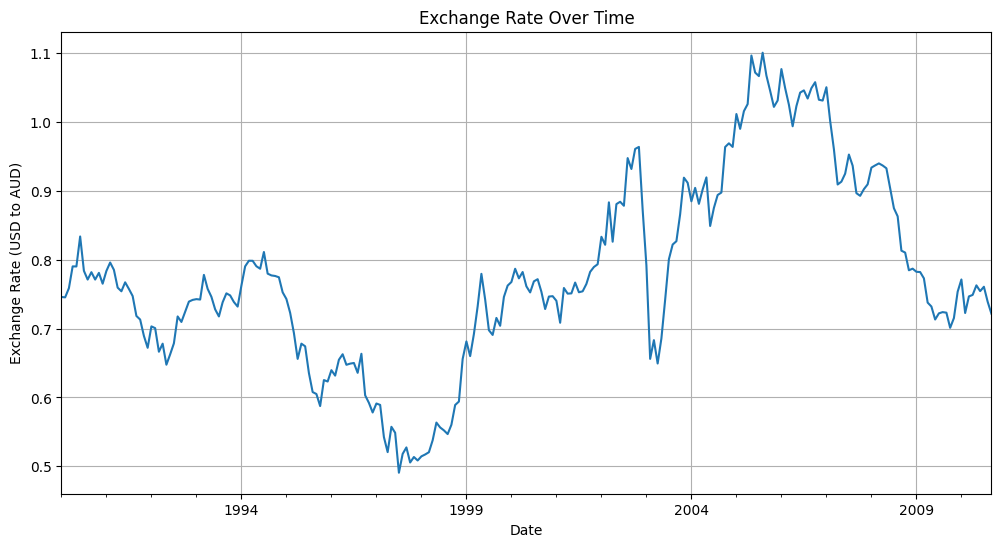

In [15]:
# Plot the exchange rate over time
df['Ex_rate'].plot(figsize=(12, 6), title='Exchange Rate Over Time')
plt.xlabel("Date")
plt.ylabel("Exchange Rate (USD to AUD)")
plt.grid(True)
plt.show()


In [16]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Ex_rate    0
dtype: int64


In [18]:
# Part 3: Train-Test Split
# Use the last 12 months as test data, rest as training data
train = df['Ex_rate'][:-12]
test = df['Ex_rate'][-12:]

print(f"Training range: {train.index.min()} to {train.index.max()}")
print(f"Testing range: {test.index.min()} to {test.index.max()}")


Training range: 1990-01-31 00:00:00 to 2009-09-30 00:00:00
Testing range: 2009-10-31 00:00:00 to 2010-09-30 00:00:00


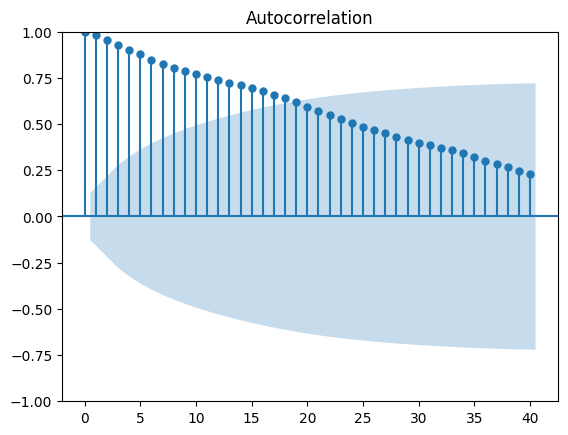

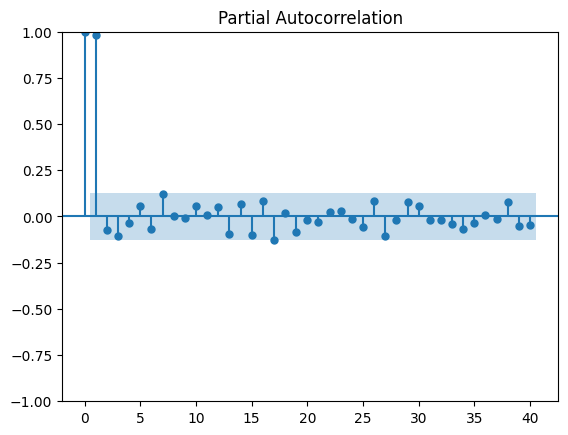

In [19]:
# Part 4: ACF/PACF Plot for ARIMA Order Estimation

# These help decide p and q for ARIMA
plot_acf(train, lags=40)
plot_pacf(train, lags=40)
plt.show()


In [20]:
# -------------------------------------
# Part 5: ARIMA Model Fitting and Forecasting
# -------------------------------------
# Fit ARIMA model (adjust order after ACF/PACF analysis if needed)
arima_model = ARIMA(train, order=(1,1,1))
arima_result = arima_model.fit()

# Forecast the next 12 months
arima_forecast = arima_result.forecast(steps=12)


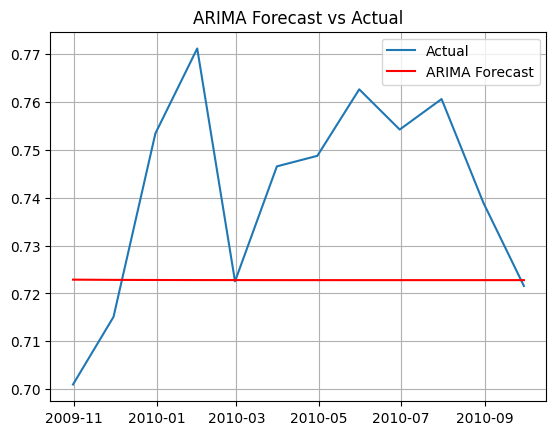

In [21]:
# -------------------------------------
# Part 5: ARIMA Model Fitting and Forecasting
# -------------------------------------
# Fit ARIMA model (adjust order after ACF/PACF analysis if needed)
arima_model = ARIMA(train, order=(1,1,1))
arima_result = arima_model.fit()

# Forecast the next 12 months
arima_forecast = arima_result.forecast(steps=12)

# Plot forecast vs actual
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()


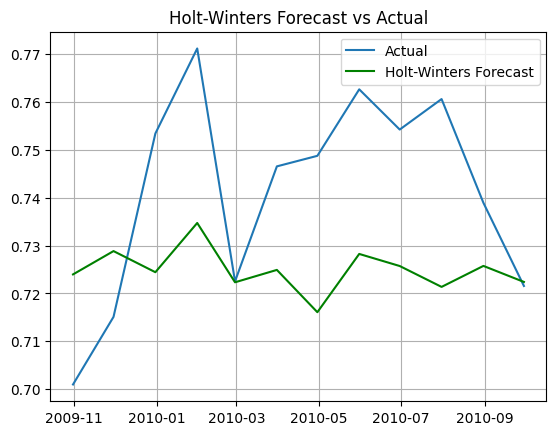

In [22]:
# -------------------------------------
# Part 6: Holt-Winters Model Fitting
# -------------------------------------
# Using additive trend and seasonality with seasonal_periods=12 for monthly data
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()

# Forecast for next 12 periods
hw_forecast = hw_result.forecast(steps=12)

# Plot Holt-Winters forecast vs actual
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast', color='green')
plt.title("Holt-Winters Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# -------------------------------------
# Part 7: Evaluation and Metrics
# -------------------------------------

# Error metrics for ARIMA
mae_arima = mean_absolute_error(test, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))
mape_arima = np.mean(np.abs((test - arima_forecast) / test.replace(0, np.nan))) * 100

# Error metrics for Holt-Winters
mae_hw = mean_absolute_error(test, hw_forecast)
rmse_hw = np.sqrt(mean_squared_error(test, hw_forecast))
mape_hw = np.mean(np.abs((test - hw_forecast) / test.replace(0, np.nan))) * 100

# Print results
print(f"ARIMA - MAE: {mae_arima:.6f}, RMSE: {rmse_arima:.6f}, MAPE: {mape_arima:.2f}%")
print(f"Holt-Winters - MAE: {mae_hw:.6f}, RMSE: {rmse_hw:.6f}, MAPE: {mape_hw:.2f}%")


ARIMA - MAE: 0.023741, RMSE: 0.027858, MAPE: 3.16%
Holt-Winters - MAE: 0.022716, RMSE: 0.026009, MAPE: 3.03%


Based on the error metrics (MAE, RMSE, and MAPE), the Holt-Winters exponential smoothing model slightly outperformed ARIMA. This suggests that the time series has both trend and seasonal components that Holt-Winters is better equipped to handle. Both models, however, produced accurate forecasts with MAPE values around 3%, indicating high model reliability for exchange rate forecasting.